# Neurons and Layers

A neural network is a type of algorithm inspired by the structure and function of human brain. It is composed of interconnected layers of nodes (neurons), that learn to approximate complex functions by adjusting weights through training, enabling tasks such as classification, regression, and pattern recognition.

## Packages

**Tensorflow and Keras**

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
plt.style.use('../helpers/custom.mplstyle')

## Neuron without activation - Regression/Linear Model

### Dataset

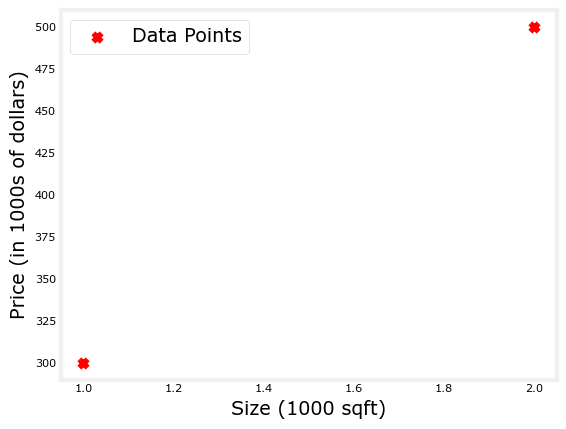

In [49]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

### Regression/Linear Model 
The function implemented by a neuron with no activation is the same as in, linear regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = \mathbf{w}\cdot x^{(i)} + b \tag{1}$$

We can define a layer with one neuron or unit and compare it to the familiar linear regression function.

In [50]:
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear', )
print(f"W: {linear_layer.get_weights()}")

W: []


There are no weights as the weights are not yet instantiated. Let's try the model on one example in `X_train`. This will trigger the instantiation of the weights. Note, the input to the layer must be 2-D, so we'll reshape it.

In [51]:
X_train_2D = X_train[0].reshape(1,1)    # using 1 example, in 2D
print(f"X: {X_train_2D}")

a1 = linear_layer(X_train_2D)
print(a1)

X: [[1.]]
tf.Tensor([[-0.21010971]], shape=(1, 1), dtype=float32)


In [52]:
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[-0.21010971]], b=[0.]


In [53]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


Let's compare equation (1) to the layer output.

In [54]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w, X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


They produce the same values!
Now, we can use our linear layer to make predictions on our training data.

In [55]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b

print(f"y: {Y_train}\nyhat: {prediction_np}")

y: [[300.]
 [500.]]
yhat: [[300.]
 [500.]]


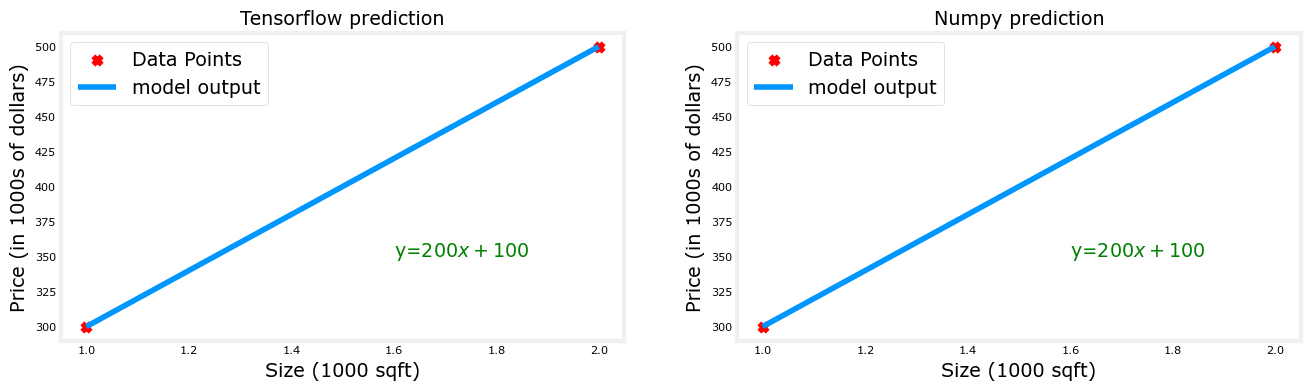

In [56]:
fig, ax = plt.subplots(1,2, figsize=(16,4))
ax[0].scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax[0].plot(X_train, prediction_tf,  c='#0096ff', label="model output")
ax[0].text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color='g')
ax[0].legend(fontsize='xx-large')
ax[0].set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax[0].set_xlabel('Size (1000 sqft)', fontsize='xx-large')
ax[0].set_title("Tensorflow prediction",fontsize='xx-large')

ax[1].scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax[1].plot(X_train, prediction_np,  c='#0096ff', label="model output")
ax[1].text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color='g')
ax[1].legend(fontsize='xx-large')
ax[1].set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax[1].set_xlabel('Size (1000 sqft)', fontsize='xx-large')
ax[1].set_title("Numpy prediction",fontsize='xx-large')
plt.show()

## Neuron with Sigmoid activation
The function implemented by a neuron/unit with a sigmoid activation is the same as in Course 1, logistic  regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = g(\mathbf{w}x^{(i)} + b) \tag{2}$$
where $$g(x) = sigmoid(x)$$ 

Let's set $w$ and $b$ to some known values and check the model.

### DataSet

In [26]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

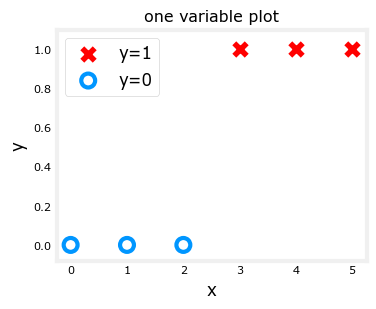

In [28]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors='#0096ff',lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [29]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


`model.summary()` shows the layers and number of parameters in the model. There is only one layer in this model and that layer has only one unit. The unit has two parameters, $w$ and $b$.

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[-0.7282531]] [0.]
(1, 1) (1,)


In [34]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


Let's compare equation (2) to the layer output.

In [39]:
def sigmoidnp(z):
    """
    Compute the sigmoid of z

    Parameters
    ----------
    z : array_like
        A scalar or numpy array of any size.

    Returns
    -------
     g : array_like
         sigmoid(z)
    """
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))

    return g

In [40]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
[[0.01098694]]
[[0.01098694]]


They produce the same values!

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


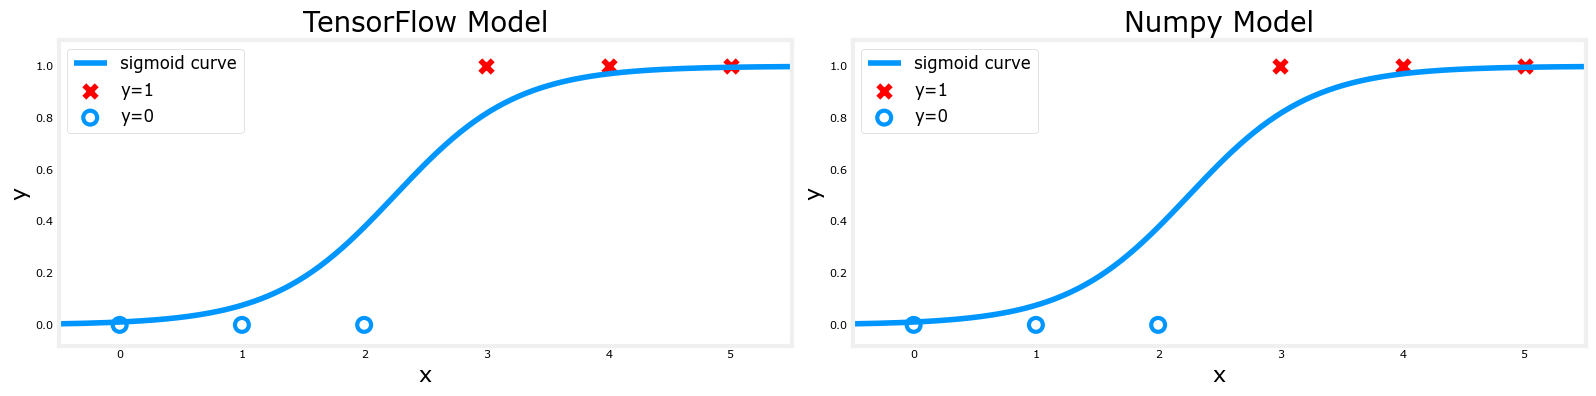

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

# Generate a range of x values
x_vals = np.linspace(-0.5, 5.5, 200).reshape(-1, 1)

# Left subplot — TensorFlow model
ax[0].plot(x_vals, model.predict(x_vals), color='#0096ff', label='sigmoid curve')

# Class points
ax[0].scatter(X_train[pos], Y_train[pos], marker='x', s=80, c='red', label="y=1")
ax[0].scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors='#0096ff', lw=3)

ax[0].set_ylim(-0.08, 1.1)
ax[0].set_xlim(-0.5, 5.5)
ax[0].set_ylabel('y', fontsize=16)
ax[0].set_xlabel('x', fontsize=16)
ax[0].set_title('TensorFlow Model', fontsize=20)
ax[0].legend(fontsize=12)

# Right subplot — Numpy model
sig_curve = sigmoidnp(np.dot(set_w, x_vals.T) + set_b).flatten()
ax[1].plot(x_vals, sig_curve, color='#0096ff', label='sigmoid curve')

ax[1].scatter(X_train[pos], Y_train[pos], marker='x', s=80, c='red', label="y=1")
ax[1].scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors='#0096ff', lw=3)

ax[1].set_ylim(-0.08, 1.1)
ax[1].set_xlim(-0.5, 5.5)
ax[1].set_ylabel('y', fontsize=16)
ax[1].set_xlabel('x', fontsize=16)
ax[1].set_title('Numpy Model', fontsize=20)
ax[1].legend(fontsize=12)

plt.tight_layout()
plt.show()
